In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import FeatureExtraction as features
from IPython.display import display

In [22]:
def importdata(df):
    
    '''
    Dataframe is imported and is used to generate graphs
    '''
    
    nr_reactants, nr_inerts, nr_products, names, nr_carbon_atoms_reactant, nr_carbon_atoms_products, molar_masses = user_input(df)        # User input is requested and imported in a pandas dataframe (see function 'user_input' for more information)
    
    df_inlet, df_outlet = visualize_input(df, nr_reactants, nr_inerts, nr_products, names)
    
    df_mass_inlet, df_mass_outlet = mass_balance(df_inlet, df_outlet, nr_reactants, nr_inerts, nr_products, names, molar_masses)
    print()
    
    df, nr_selectivities = treat_data(df, nr_reactants, nr_inerts, nr_products, names,  nr_carbon_atoms_reactant, nr_carbon_atoms_products)    # process variables, inlet and outlet flows are displayed as a table (see function 'treat_data' for more information)
    
    df_ind = independent_variables(df, nr_reactants, nr_inerts, nr_products, nr_selectivities)           #  the independent variables are stored in a separate dataframe (see function 'independent_variables' for more information)
    
    print("Independent variables:")
    display(df_ind)
    print()
    
    df_ind_simple = adjust_values_dataframe(df_ind)                              # the dataframe is simplified (see function 'simplify_dataframe' for more information)
    print()

    print("Adjusted independent variables:")
    display(df_ind_simple)
    print()
    print()
    
    df_out = dependent_variables(df, nr_reactants, nr_inerts, nr_products, nr_selectivities)     # the dependent variables are stored in a separate dataframe (see function 'output_variables' for more information)
    
    print("Dependent variables:")
    display(df_out)
    print()
    
    sets_all, nr_sets, sets_all_repeats, nr_sets_repeats = data_points(df_ind_simple)            # indices of measurements used to plot graphs (see function 'data_points' for more information)
    sets_all, nr_sets = add_conversion(sets_all, nr_sets)                                        # the conversion is also added as a possible x-value for the graphs (see function 'add_conversion' for more information)
    sets_all_repeats, nr_sets_repeats = add_conversion(sets_all_repeats, nr_sets_repeats)
    
    print("Plots with all measurements:")
    print()
    
    plot_all(df_ind_simple, df_out, sets_all_repeats, nr_sets_repeats, nr_selectivities)            # Plots with all measurements
    
    print("Dataframes corresponding to plots:")
    print()
    
    dataframes, titles, var_index, operation_conditions = generate_graphs(df_ind, df_ind_simple, df_out, sets_all, nr_sets)      # All meaningful plots   # list of dataframes corresponding to generated plots (see function 'generate_graphs' for more information)
    
    nr_plots = len(var_index)                   # Number of plots
    
    graphs_index = select_graphs(nr_plots)      # User selects plots (see function 'select_graphs' for more information)
    
    dataframes_features = graphs_features(dataframes, titles, graphs_index)      # Features are extracted (see function 'graphs_features' for more information)
    
    print()
    
    generate_parametric_graphs(dataframes, df_ind_simple, df_out, var_index, operation_conditions, nr_sets, nr_selectivities)     # Parametric feature extraction (see function 'generate_parametric_graphs' for more information)

In [23]:
def user_input(df):
    
    '''
    Asks for user input and returns the number of reactants, the number of inerts, the number of products,
    a list containing the names of all components and a list indicating the stoichiometry
    '''
    
    nr_columns = len(df.iloc[0,:])
    nr_components_correct = (nr_columns - 3)/2
    
    correct_input = False
    
    while correct_input == False:
    
        while True:           # while-loop is only exited once correct input has been entered by the user
        
            try:
            
                nr_reactants = int(input("Number of reactants: "))      # Number of reactants
                print()
            
                if nr_reactants >= 1:
                
                    break                           # If the input is an integer, loop is exited
                
                else:
                    
                    print("Number of reactants must be at least 1")
                    print()
           
            except ValueError:                  # If the input is not an integer, a ValueError occurs and the loop continues
            
                print()
                print("Input must be an integer")
                print()
    
        while True:          # while-loop is only exited once correct input has been entered by the user
        
            try:
            
                nr_inerts = int(input("Number of inerts: "))      # Number of inerts
                print()
                
                if nr_inerts >= 0:
                
                    break                           # If the input is an integer, loop is exited
                    
                else:
                    
                    print("Number of inerts must be at least 0")
                    print()
                
            except ValueError:                  # If the input is not an integer, a ValueError occurs and the loop continues
            
                print()
                print("Input must be an integer")
                print()
    
        while True:          # while-loop is only exited once correct input has been entered by the user
        
            try:
            
                nr_products = int(input("Number of products: "))      # Number of products
                print()
            
                if nr_products >= 1:
                
                    break                           # If the input is an integer, loop is exited
                    
                else:
                    
                    print("Number of products must be at least 1")
                    print()
                
            except ValueError:                  # If the input is not a number, a NameError occurs and the loop continues
            
                print()
                print("Input must be an integer")
                print()
        
        if nr_reactants + nr_products + nr_inerts == nr_components_correct:
            
            correct_input =  True
            
        else:
            
            print("Total number of components does not correspond to input file")
            print()
    
    print()
    
    nr_components = nr_reactants + nr_inerts + nr_products
    
    '''
    Names of the components are requested
    '''
    
    names = []                                            # List storing names of all components
    
    for i in range(0,nr_reactants):                       # Names of reactants are added to the list 'names'
        
        message = "Name reactant " + str(i+1) + ": "      # Message which will be shown to the user
        
        name = str(input(message))                        # Name of reactant is requested
        print()
        
        names.append(name)
        
    print()
        
    for i in range(0,nr_inerts):                          # Names of inerts are added to the list 'names'
        
        message = "Name inert " + str(i+1) + ": "         # Message which will be shown to the user
        
        name = str(input(message))                        # Name of inert is requested
        print()
        
        names.append(name)
        
    print()
        
    for i in range(0,nr_products):                        # Names of products are added to the list 'names'
        
        message = "Name product " + str(i+1) + ": "       # Message which will be shown to the user
        
        name = str(input(message))                        # Name of product is requested
        print()
        
        names.append(name)
        
    print()
    
    '''
    Number of carbon atoms is requested for the limiting reactant and the number carbon atoms in the products originating from the limiting reactant
    '''
    
    message = "Number of carbon atoms of " + names[0] + ": "
        
    while True:           # while-loop is only exited once correct input has been entered by the user
            
        try:
                
            nr_carbon_atoms_reactant = int(input(message))    # Number of carbon atoms of the limiting reactant
            print()
                
            if nr_carbon_atoms_reactant >= 0:
            
                break                                         # If a positive number or zero is inserted, the loop is exited
                
            else:
                    
                print("Number must be at least 0")
                print()
                
        except ValueError:                                    # If the input is not an integer, a ValueError occurs and the loop continues
            
            print()
            print("Input must be an integer")
            print()
        
    print()
    
    nr_carbon_atoms_products = []
    
    for i in range(0,nr_products):                       # Number of carbon atoms of products originating from limiting reactant are added to the list 'stoichiometry'
        
        message = "Number of carbon atoms of " + names[nr_reactants+nr_inerts+i] + " originating from " + names[0] + ": "
        
        while True:           # while-loop is only exited once correct input has been entered by the user
            
            try:
                
                nr_C_product = int(input(message))      # Number of carbon atoms originating from the limiting reactant
                print()
                
                if nr_C_product >= 0:
            
                    break                                       # If a positive number or zero is inserted, the loop is exited
                
                else:
                    
                    print("Number must be at least 0")
                    print()
                
            except ValueError:                                  # If the input is not an integer, a ValueError occurs and the loop continues
            
                print()
                print("Input must be an integer")
                print()
        
        nr_carbon_atoms_products.append(nr_C_product)
        
    print()
        
    '''
    The molar masses are requested
    '''
    
    molar_masses = []
    
    for i in range(0,nr_components):                       # Stoichiometries of products are added to the list 'stoichiometry'
        
        message = "Molar mass of " + names[i] + " in g/mol: "
        
        while True:           # while-loop is only exited once correct input has been entered by the user
            
            try:
                
                molar_mass = float(input(message))        # Molecules of products that can be formed per molecule of the main reactant
                print()
                
                if molar_mass > 0:
            
                    break                                           # If a positive number is inserted, the loop is exited
                
                else:
                    
                    print("Number must be higher than 0")
                    print()
                
            except ValueError:                                  # If the input is not a number, a ValueError occurs and the loop continues
            
                print()
                print("Input must be a number")
                print()
        
        molar_masses.append(molar_mass)
        
    print()
    
    return nr_reactants, nr_inerts, nr_products, names, nr_carbon_atoms_reactant, nr_carbon_atoms_products, molar_masses

In [24]:
def visualize_input(df, nr_reactants, nr_inerts, nr_products, names):
    
    '''
    Visualizes the operating conditions, the inlet and outlet flows of the dataset in two three tables
    '''
    
    nr_components = nr_reactants + nr_inerts + nr_products      # Number of components
    
    df_pc = df.iloc[:,0:3]                                      # Dataframe of process conditions
    df_inlet = df.iloc[:,3:3+nr_components]                     # Dataframe of inlet values
    df_outlet = df.iloc[:,3+nr_components:3+2*nr_components]    # Dataframe of outlet values
    
    '''
    Process conditions
    '''
    
    names_pc = ["W [g]", "T [K]", "p [MPa]"]              # Names of process conditions
    
    df_pc.columns = names_pc                              # Add names to DataFrame
    
    '''
    Inlet flows
    '''
    
    names_inlet = []                                      # Names of inlet flows
    
    for i in range(0,nr_components):                      # The names of each inlet flow is added one by one
                   
        column_name = "F°(" + names[i] + ") [µmol/s]"
        names_inlet.append(column_name)
        
    df_inlet.columns = names_inlet                        # Add names to DataFrame
    
    '''
    Outlet flows
    '''
    
    names_outlet = []                                     # Names of outlet flows
    
    for i in range(0,nr_components):                      # The names of each outlet flow is added one by one
                   
        column_name = "F(" + names[i] + ") [µmol/s]"
        names_outlet.append(column_name)
                   
    df_outlet.columns = names_outlet                      # Add names to DataFrame
    
    print("Process conditions:")
    display(df_pc)
    print()
    print("Inlet molar flows:")
    display(df_inlet)
    print()
    print("Outlet molar flows:")
    display(df_outlet)
    print()
    
    return df_inlet, df_outlet

In [25]:
def mass_balance(df_inlet, df_outlet, nr_reactants, nr_inerts, nr_products, names, molar_masses):
    
    '''
    Mass balance is checked by converting the molar flow rates to mass flow rates
    '''
    
    nr_components = nr_reactants + nr_inerts + nr_products
    
    df_mass_inlet, df_mass_inlet_tot = pd.DataFrame(), pd.DataFrame()        # Inlet mass flows (first table does not contain inerts, second table does)
    df_mass_outlet, df_mass_outlet_tot = pd.DataFrame(), pd.DataFrame()      # Outlet mass flows (first table does not contain inerts, second table does)
    
    for i in range(0, nr_components):
        
        column_name_inlet = "F°(" + names[i] + ") [µg/s]"      # Inlet column name
        column_name_outlet = "F°(" + names[i] + ") [µg/s]"     # Outlet column name
        
        df_mass_inlet_tot[column_name_inlet] = df_inlet.iloc[:,i] * molar_masses[i]      
        df_mass_outlet_tot[column_name_outlet] = df_outlet.iloc[:,i] * molar_masses[i]
        
        if i < nr_reactants or i >= nr_reactants + nr_inerts:                            # For these tables, the inerts are added
            
            df_mass_inlet[column_name_inlet] = df_inlet.iloc[:,i] * molar_masses[i]
            df_mass_outlet[column_name_outlet] = df_outlet.iloc[:,i] * molar_masses[i]
        
    print("Inlet mass flows:")
    display(df_mass_inlet_tot)
    print()
    print("Outlet mass flows:")
    display(df_mass_outlet_tot)
    print()
    
    nr_rows = len(df_inlet)
    
    mass_balance_results = []                   # List of values which can be 0 or 1, for each row
                                                # 0: mass balance not satisfied, 1: mass balance satisfied
    for i in range(0, nr_rows):
        
        row_inlet = df_mass_inlet.iloc[i,:]
        row_outlet = df_mass_outlet.iloc[i,:]
        
        sum_inlet = row_inlet.sum()                      # Sum of all inlet flows
        sum_outlet = row_outlet.sum()                    # Sum of all outlet flows
        
        relative_difference = np.abs(sum_outlet - sum_inlet)/sum_inlet
        
        if relative_difference < 0.01:                   # Difference must be below 1%
            
            mass_balance_results.append(1)
            
        else:
            
            mass_balance_results.append(0)
            
            print("Row ", i, ": Mass balance not satisfied", sep="")
            
    if mass_balance_results.count(0) == 0:     
        
        print("Mass balance is satisfied for all rows")
        
    print()
        
    return df_mass_inlet, df_mass_outlet

In [26]:
def treat_data(df, nr_reactants, nr_inerts, nr_products, names,  nr_carbon_atoms_reactant, nr_carbon_atoms_products):
    
    '''
    Columns corresponding to the conversion of the main reactant, the selectivities of the products,
    the space-time and the ratios of the secondary reactants to the main reactant are added to the dataframe
    '''
    
    nr_components = nr_reactants + nr_inerts + nr_products   # Number of components
    
    Weights = df.iloc[:,0]                                   # Catalyst weights: first column of dataframe

    '''
    Calculation of conversion of main reactant
    '''
    
    Main_Reactant_In = df.iloc[:,3]                          # Inlet flow of main reactant (main reactant: first component)
    Main_Reactant_Out = df.iloc[:,3+nr_components]           # Outlet flow of main reactant
    
    Conversion = 100*(Main_Reactant_In - Main_Reactant_Out)/Main_Reactant_In       # Conversion of main reactant is calculated
    title = "Conversion " + names[0] + " [mol%]"                                   # Title of new column corresponding to conversion
    df[title] = pd.Series(Conversion, index=df.index)                              # Conversion is added to dataframe
    
    '''
    Calculation of selectivities of the products
    '''
    
    nr_selectivities = 0
    
    for i in range(0,nr_products):
        
        if nr_carbon_atoms_products[i] > 0:
            
            nr_selectivities += 1
        
            Product_In = df.iloc[:, 3+nr_reactants+nr_inerts+i]                        # Inlet flow of product
            Product_Out = df.iloc[:, 3+nr_reactants+nr_inerts+nr_components+i]         # Outlet flow of product
        
            Si = 100*nr_carbon_atoms_products[i]/nr_carbon_atoms_reactant*(Product_Out-Product_In)/(Main_Reactant_In - Main_Reactant_Out)    # Selectivity of product is calculated
            
            title = "Selectivity " + names[nr_reactants+nr_inerts+i] + " [mol%]"                         # Title of new column corresponding to selectivity
            df[title] = pd.Series(Si, index=df.index)                                                    # Selectivity is added to dataframe
        
    '''
    Calculation of space-time
    '''
    
    Space_Time = 1000*Weights/Main_Reactant_In                                     # Space-time is calculated
    df['Space-time [kg s mol-1]'] = pd.Series(Space_Time, index=df.index)          # Space-time is added to dataframe
    
    '''
    Calculation of ratios of the secondary reactants to the main reactant
    '''
    
    for i in range(0,nr_reactants-1):
        
        Reactant_In = df.iloc[:,4+i]                               # Inlet flow of secondary reactant
        Ratio_Reactants = Reactant_In/Main_Reactant_In             # Ratio of secondary reactant to main reactant
        
        title = names[1+i] + "/" + names[0] + " ratio [-]"         # Title of new column corresponding to ratio
        df[title] = pd.Series(Ratio_Reactants, index=df.index)     # Ratio is added to dataframe
        
    return df, nr_selectivities

In [27]:
def independent_variables(df, nr_reactants, nr_inerts, nr_products, nr_selectivities):
    
    '''
    Return dataframe with only the independent variables
    '''
    
    nr_components = nr_reactants + nr_inerts + nr_products       # Number of components
    
    Part_1 = df.iloc[:,[1,2]]                                                                                  # Temperature and pressure
    Part_2 = df.iloc[:,4+2*nr_components+nr_selectivities:4+2*nr_components+nr_selectivities+nr_reactants]     # Space-time and reactant ratios
    
    df_ind = pd.concat([Part_1, Part_2], axis=1, join='inner')   # Dataframe with independent variables
    
    Temperature = df_ind.iloc[:,0]
    Pressure = df_ind.iloc[:,1]
    
    df_ind = df_ind.rename(columns={Temperature.name:'T [K]'})
    df_ind = df_ind.rename(columns={Pressure.name:'p [MPa]'})

    return df_ind  

In [28]:
def dependent_variables(df, nr_reactants, nr_inerts, nr_products, nr_selectivities):
    
    '''
    Return dataframe with only the dependent variables (conversion, selectivities)
    '''
    
    nr_components = nr_reactants + nr_inerts + nr_products                      # Number of components
    
    df_out = df.iloc[:,3+2*nr_components:4+2*nr_components+nr_selectivities]    # Conversion of main reactant and selectivities of the products

    return df_out 

In [29]:
def adjust_values_dataframe(df_ind):
    
    '''
    Simplifies values in dataframe based on a given margin of error for each independent variable
    
    Sometimes values differ slightly but are still grouped together, so this function replaces the values which are grouped
    together by their average
    '''
    
    nr_ind = len(df_ind.iloc[0,:])          # Number of independent variables
    nr_rows = len(df_ind)                   # Number of rows of the dataset
    
    for i in range(0, nr_ind):              # Each column is simplified
        
        column_orig = df_ind.iloc[:,i]      # Series-objects corresponding to column
        
        column = column_orig.copy()         # A copy is made to edit it
        
        message = "Margin of error for " + column.name + ": "    # Message asks user for margin of error
        
        while True:           # while-loop is only exited once correct input has been entered by the user
            
            try:
                
                margin_error = float(input(message))
                print()
                
                if margin_error >= 0:
            
                    break                                           # If a number is inserted, the loop is exited
                
            except ValueError:                                  # If the input is not a number, a ValueError occurs and the loop continues
            
                print()
                print("Input must be a number")
                print()
                
        done = False                           # Indicates whether algorithm is done for the independent variable or not
        
        column_list = column.tolist()          # Series-object is turned into a list
        
        indices_remaining = []                 # List of indices of experiments that have not been simplified yet
        
        for i in range(0, nr_rows):
            
            indices_remaining.append(i)        # The original list consists of all indices: [0,1,2,...,nr_rows-1]
        
        '''
    The values in the Series-object 'column' will be edited and simplified
        
    The list 'column_list' contains the values that have not been modified yet. Once a value is modified,
    it is removed from the list 'column_list' and it index is removed from the list 'indices_remaining'
        '''
        
        while done == False:
            
            if len(column_list) > 0:            # Only perform the algorithm if there are values left in the list
                
                minimum = min(column_list)      # Smallest value in the list
                
                values_removed = []             # Stores values that belong are considered to be the same as 'minimum'
                indices_removed = []            # Stored the indices of these values
                
                for i in range(len(column_list)-1, -1, -1):              # for-loop from the last position to the first position (makes removing elements from the list easier)
                    
                    if column_list[i] <= minimum + 2 * margin_error:     # Value is considered to same if it is smaller than minimum + twice the margin of error
                        
                        values_removed.append(column_list[i])            # The value is added to the list of values that will be removed
                        indices_removed.append(indices_remaining[i])     # The index is added to the list of indices that will be removed
                        
                        del column_list[i]                               # Value is removed
                        del indices_remaining[i]                         # Index is removed
                        
                average = sum(values_removed)/len(values_removed)        # Average is taken of values that are considered to be the same
                
                for i in range(0, len(values_removed)):         # The values are updated in the Series-object 'column'
                    
                    column[indices_removed[i]] = average        # The values are replaced by their average
                
                df_ind[column.name] = column                    # The column is replaced by the new column
            
            else:                   # If the length of 'column_list' is zero, the algorithm is finished
                
                done = True
                
    return df_ind

In [30]:
def find_data_points(df_ind_simple, index_variable):
    
    '''
    Finds sets of points which vary in the considered variable with index 'index_variable' and are constant in the other variables
    '''
    
    nr_rows = len(df_ind_simple)             # Number of rows in the dataframe
    nr_ind = len(df_ind_simple.iloc[0,:])    # Number of columns inthe dataframe
    
    sets_points = []                # List stores the sets of points which need to be found
    set_points_repeats = []         # Same list, but also contains sets with only repeats at the same conditions
    points_considered = []          # List stores the indices of the points which are already part of a set of points
    
    for i in range(0,nr_rows-1):    # Index i is used to select a row of the dataframe        
        
        if points_considered.count(i) == 0:       # If the index i is already part of a set of points, it is not considered anymore
            
            Row_i = df_ind_simple.iloc[i,:]       # Row with index i
            points = [i]                          # List stores indices of rows which belong in the same set as row i
            values = [Row_i[index_variable]]      # List stores the values of the considered variable corresponding to the rows in the list 'points'
            
            for j in range(i+1,nr_rows):          # Index j is used to select another row of the dataframe to compare to row j
                
                Row_j = df_ind_simple.iloc[j,:]   # Row with index j
                
                other_conditions_equal = True                           # The other variables should be constant; this list indicates whether this is the case or not
                    
                for k in range(0,nr_ind):                               # Columns of the dataframe are considered
                        
                    if Row_i[k] != Row_j[k] and k != index_variable:    # The values for the variables should be the same, except for the variable with index 'index_variable'
                            
                        other_conditions_equal = False                  # If this is not the case, 'other_conditions_equal' becomes False
                            
                if other_conditions_equal == True:                      # The value is true if the rows are the same besides the considered variable
                        
                    points_considered.append(j)                         # In this case, the index of row j is added to the list of considered points
                    points.append(j)                                    # Index j is added to 'points'
                    values.append(Row_j[index_variable])                # Value of the considered variable in row j is added to 'values'
                            
            if len(values) > 1:        # A set of points is added to 'sets_points' if it contains more than one index
                
                set_points_repeats.append(points)   # All sets of points are added the list
                
                if values.count(values[0]) != len(values):
                    
                    sets_points.append(points)      # Set of points added to list if it's not just a set of repeats
                
    return sets_points, set_points_repeats

In [31]:
def data_points(df_ind_simple):
    
    '''
    Applies the find_data_points function on a dataframe for all variables and returns two lists
    
    For example:
    
    sets_all = [[2, 5, 6, 7], [0, 9], [1, 2, 4], [1, 3, 9]]
    nr_sets = [1, 0, 2, 1]
    
    1, 0, 2 and 1 sets of data points were found for the first, second, third and fourth independent variable respectively
    The sets are shown in order in the list 'sets_all'
    
    First independent variable: one set of data points -> [2, 5, 6, 7]
    Second independent variable: zero sets of data points
    Third independent variable: two sets of data points -> [0, 9] and [1, 2, 4]
    Fourth independent variable: one set of data points -> [1, 3, 9]
    '''
    
    nr_ind = len(df_ind_simple.iloc[0,:])    # Number of columns inthe dataframe
    
    sets_all = []     # List of sets of data points
    sets_all_repeats = []
    
    nr_sets = []      # List with the number of sets per independent variable
    nr_sets_repeats = []
    
    for i in range(0, nr_ind):
        
        points, points_repeats = find_data_points(df_ind_simple, i)     # Sets of data points for variable i                              # Number of sets of data points for variable i
        
        for j in range(0, len(points)):
            sets_all.append(points[j])                      # The sets of data points are added to 'sets_all' one by one
            
        for j in range(0, len(points_repeats)):
            sets_all_repeats.append(points_repeats[j])      # The sets of data points are added to 'sets_all' one by one
        
        nr_sets.append(len(points))                         # The number of sets of data points is added to the list 'nr_points'
        nr_sets_repeats.append(len(points_repeats))
        
    return sets_all, nr_sets, sets_all_repeats, nr_sets_repeats

In [32]:
def add_conversion(sets_all, nr_sets):
    
    '''
    The lists 'sets_all' and 'nr_sets' are edited by also considering the conversion an input variable
    
    This is done by repeating the sets of the space-time (index = 2 in 'nr_sets'),
    as the conversion plots are made plotted using varying space-time
    '''

    i_set = 0                  # Considered set
    
    for i in range(0,3):                    #  Only the indices up to 2 must be considered as space time has index 2
        
        for j in range(0,nr_sets[i]):
            
            if i == 2:                                # For space-time, repeat the sets
                sets_all.append(sets_all[i_set])
                
            i_set += 1                      # Following set
    
    nr_sets.append(nr_sets[2])              # Repeat the number of sets for speace-time
    
    return sets_all, nr_sets

In [33]:
def plot_all(df_ind_simple, df_out, sets_all, nr_sets, nr_selectivities):
    
    '''
    All measurements are plotted for all possible meaningful plots
    All data points with the same operating conditions (besides the plotted independent variable) are plotted using different markers
    
    First, the conversion is plotted in function of the independent variables
    '''
    
    nr_rows = len(df_ind_simple)          # Number of measurements
    
    all_indices = []                      # The indices of all measurements are stored in a list
    
    for i in range(0, nr_rows):
        
        all_indices.append(i)
    
    i_point = 0                           # Index indicating type of marker
    i_set = 0                             # Index indicating number of set of measurements with equal conditions
    i_plot = 0                            # Index indicating number of plot
    
    for i in range(0, len(nr_sets)-1):             # Independent variable i is considered to be plotted
        
        remaining_indices = all_indices.copy()     # The measurements which have not been considered yet are stored, at the start all indices are in the list
        
        column_names = []                          # Names of the columns of the created DataFrame
        
        print("PLOT ", i_plot+1, ":", sep="")
        print("-----------------------")
        print()
        
        for j in range(0, len(nr_sets)-1):         # The columns of the DataFrame are created based on independent variables j
            
            if i != j:
                
                x_series = df_ind_simple.iloc[:,j]         # The values of all independent variables other than i must be added to the DataFrame
                
                column_names.append(x_series.name)         # The names of the columns are set
                
        df_plot = pd.DataFrame(columns=column_names)       # An empty DataFrame is created with these column names
        
        for j in range(0, nr_sets[i]):                     # Set number j of independent variable i
            
            marker_color, marker_shape, marker_name = marker_type(i_point)    # See function 'marker_type' for more information
            
            for k in range(0, len(sets_all[i_set])):                   # for-loop of the set of measurements i_set
                
                set_measurements = sets_all[i_set]                     # the set of measurements
                
                index_measurement = set_measurements[k]                # Measurements k of the set
                
                x_value = df_ind_simple.iloc[index_measurement,i]      # x-value to be plotted (independent variable i)
                y_value = df_out.iloc[index_measurement,0]             # y-value to be plotted (conversion)
                
                remaining_indices.remove(index_measurement)            # The measurements can now be removed from the list of remaining measurments
                
                plt.plot(x_value, y_value, marker_shape, color=marker_color, ms=10)      # The measurement is plotted
                
                if k == 0:                  # For the first measurement in the set, the DataFrame is updated with its conditions
                    
                    values_ind = []         # Values of the constant operating conditions
            
                    for l in range(0, len(nr_sets)-1):
                
                        if i != l:
                    
                            values_ind.append(df_ind_simple.iloc[index_measurement,l])     # Values are added to the list of the constant operating conditions
                    
                    df = pd.DataFrame([values_ind],columns=column_names)    # Values are added to a DataFrame
                    df = df.rename(index={0:marker_name})                   # Row name is edited
                    df_plot = df_plot.append(df)                            # DataFrame for plot is updated
            
            i_point += 1              # A new marker type must be used for the next set
            i_set += 1                # A new set must now be considered
        
        for k in range(0, nr_rows):                # The same os now done to measurements which are not part of a set
            
            if remaining_indices.count(k) > 0:     # The measurement must still be in 'remaining_indices'
                
                index_measurement = k              # Measurement k
                
                marker_color, marker_shape, marker_name = marker_type(i_point)      # See function 'marker_type' for more information
                
                x_value = df_ind_simple.iloc[k,i]           # x-value to be plotted (independent variable i)  
                y_value = df_out.iloc[k,0]                  # y-value to be plotted (conversion)
                
                plt.plot(x_value, y_value, marker_shape, color=marker_color, ms=10)       # The measurement is plotted
                
                values_ind = []                      # The other operating conditions must once again be added to the DataFrame
            
                for l in range(0, len(nr_sets)-1):
                
                    if i != l:
                    
                        values_ind.append(df_ind_simple.iloc[index_measurement,l])
                
                df = pd.DataFrame([values_ind],columns=column_names)       # Values are added to a DataFrame
                df = df.rename(index={0:marker_name})                      # Row name is edited
                df_plot = df_plot.append(df)                               # DataFrame for plot is updated
                
                i_point += 1                   # A new marker type must be used for the next measurement
                
        x_series = df_ind_simple.iloc[:,i]     # Indepent variable
        y_series = df_out.iloc[:,0]            # Conversion
        
        plt.xlabel(x_series.name)       # The x-values are labeled
        plt.ylabel(y_series.name)       # The y-values are labeled
            
        i_point = 0          # After every independent variable, the index for the marker type is reset
        i_plot += 1          # A new plotted will be plotted
                
        plt.show()  
        display(df_plot)
        print()
        
    '''
    Now the selectivities of the products will be plotted in function of the conversion
    '''    
        
    column_names = []                              # Names of the columns of the DataFrame
    
    for j in range(0, len(nr_sets)-1):             # The names are generated before the for-loop
            
        if j != 2:
                
            x_series = df_ind_simple.iloc[:,j] 
                
            column_names.append(x_series.name)
    
    i_set_original = i_set                               # The i_set before the loop is stored in 'i_set_original'
    
    for i in range(0, nr_selectivities):                      # A loop is done for each product
        
        remaining_indices = all_indices.copy()           # Reset remaining indices
        
        print("PLOT ", i_plot+1, ":", sep="")
        print("-----------------------")
        print()
                
        df_plot = pd.DataFrame(columns=column_names)     # DataFrame is initialised
        
        i_set = i_set_original                           # For each product, i_set is reset to i_set_original as they use the same sets of measurements 
        
        for j in range(0, nr_sets[-1]):
            
            marker_color, marker_shape, marker_name = marker_type(i_point)    # See function 'marker_type' for more information
            
            for k in range(0, len(sets_all[i_set])):               # Set with index i_set is considered
                
                set_measurements = sets_all[i_set]                 # The set with the measurments
                
                index_measurement = set_measurements[k]            # The k'th measurement
                
                x_value = df_out.iloc[index_measurement,0]         # Conversion
                y_value = df_out.iloc[index_measurement,i+1]       # The i'th selectivity
                
                remaining_indices.remove(index_measurement)        # Index of measurement is removed
                
                plt.plot(x_value, y_value, marker_shape, color=marker_color, ms=10)     # Measurement is plotted
                
                if k == 0:                  # For the first measurement in the set
                    
                    values_ind = []         # Values of the constant independent variables
            
                    for l in range(0, len(nr_sets)-1):
                
                        if l != 2:
                    
                            values_ind.append(df_ind_simple.iloc[index_measurement,l])
                    
                    df = pd.DataFrame([values_ind],columns=column_names)        # DataFrame for the set of measurements
                    df = df.rename(index={0:marker_name})                       # Row name is changed to marker_name
                    df_plot = df_plot.append(df)                                # It is added to the full DataFrame
            
            i_point += 1            # Next marker type
            i_set += 1              # Next set of measurments
        
        for k in range(0, nr_rows):                # Now the other measurements are considered
            
            if remaining_indices.count(k) > 0:     # The measurement must appear in 'remaining_indices'
                
                index_measurement = k              # The k'th measurement
                
                marker_color, marker_shape, marker_name = marker_type(i_point)     # See function 'marker_type' for more information
                
                x_value = df_out.iloc[k,0]         # Conversion
                y_value = df_out.iloc[k,i+1]       # i'th selectivity
                
                plt.plot(x_value, y_value, marker_shape, color=marker_color, ms=10)     # Measurment is plotted
                
                values_ind = []        # Values of the independent variables other than space-time
            
                for l in range(0, len(nr_sets)-1):
                
                    if l != 2:
                    
                        values_ind.append(df_ind_simple.iloc[index_measurement,l])
                
                df = pd.DataFrame([values_ind],columns=column_names)     # DataFrame with independent variables other than space-time
                df = df.rename(index={0:marker_name})                    # Row name is replaced by marker_name
                df_plot = df_plot.append(df)                             # DataFrame is added to the full DataFrame
                
                i_point += 1              # Next marker type
                
        x_series = df_out.iloc[:,0]       # Conversion
        y_series = df_out.iloc[:,i+1]     # Selectivity
        
        plt.xlabel(x_series.name)         # The x-values are labeled
        plt.ylabel(y_series.name)         # The y-values are labeled
            
        i_point = 0          # Marker type reset for next plot
        i_plot +=1           # Next plot
                
        plt.show()
        display(df_plot)
        print()
        

In [34]:
def marker_type(i_point):
    
    '''
    Decides which type of marker is used based on an integer i_point >= 0
    '''
    
    i_point %= 64            # 64 types of markers are possible, this line is added to avoid errors
    
    colours = ['r', 'b', 'g', 'y', '#9400d3', '#ff8c00', '#808080', '#FF1493']                   # 8 considered colours
    shapes = ['o', '^', 's', 'p', 'D', 'X', '*', 'P', 'o', '^', 's', 'p', 'D', 'X', '*', 'P']    # 8 considered shapes, added twice to make it possible to have indices higher than 7 (see later)
    
    colour_names = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'grey', 'pink']
    shape_names = ['circles ⬤', 'triangles ▲', 'squares ⬛', 'pentagons ⬟', 'diamonds ⯁', 'crosses 🗙', 'stars ★', 'plus signs ✚', 'circles ⬤', 'triangles ▲', 'squares ⬛', 'pentagons ⬟', 'diamonds ⯁', 'crosses 🗙', 'stars ★', 'plus signs ✚']
    
    index_1 = i_point%8      # This index determines the color of the marker
    index_2 = i_point//8     # The sum of both indices determines the shape of the marker
    
    colour = colours[index_1]              # colour is chosen 
    shape = shapes[index_1 + index_2]      # shape is chosen
    
    colour_name = colour_names[index_1]                 # Name of the colour
    shape_name = shape_names[index_1 + index_2]         # Name of the shape
    
    marker_name = colour_name + " " + shape_name        # Name of the marker: name of colour + name of shape
    
    return colour, shape, marker_name

In [35]:
def generate_graphs(df_ind, df_ind_simple, df_out, sets_all, nr_sets):
    
    '''
    Generates all the graphs which can be made from the dataset and returns a list of dataframes which contains the
    data used to make the graphs
    '''
    
    nr_rows = len(df_ind_simple)                # Total number of experiments
    nr_ind = len(df_ind_simple.iloc[0,:])       # Number independent variables
    nr_out = len(df_out.iloc[0,:])              # Number independent variables


    '''
    The graphs are plotted using multiple for-loops
    
    Index i indicates the considered independent variable
    Index j indicates the considered set of data points for a certain independent variable
    
    For example:
    
    nr_sets = [1, 0, 2, 1]
    
    If i = 0: there is only one set of data points, so j can only take the index 0
    If i = 1: there is no set of data points, so j cannot take any index
    If i = 2: there are two sets of data points, so j can takes the indices 0 and 1
    If i = 3: there is only one set of data points, so j can only take the index 0
    
    Index i_set indicates the considered column of the grid
    Index k indicates the considered output
    
    First, the outputs are plotted in function of the independent variables
    '''

    dataframes = []              # List of dataframes corresponding to the columns of the grid
    titles = []
    var_index = []
    operation_conditions = []
    
    i_set = 0                    # The first column has index 0
    i_plot = 0
    
    for i in range(0, nr_ind):
        
        for j in range(0,nr_sets[i]):
            
            set_points = sets_all[i_set]        # set_points contains the indices of the measurements which are used in the column with index i_set
            
            x_series = df_ind.iloc[:,i]         # The column corresponding to the independent variable i
            x_series_set = x_series.copy()      # A copy is made of the Series-object to edit it
            
            for index_row in range(0,nr_rows):
                
                if set_points.count(index_row) == 0:                   # If the measurement does not appear in set_points, it is removed from the Series
                    x_series_set = x_series_set.drop(index_row)        # Only the measurements which need to be plotted remain in the Series
                    
            x = x_series_set.tolist()           # The Series-object is turned into a list
            
            title = ""            # The title of the plot
            
            op_cond = []          # List of the values of the operation conditions (constant independent variables)
            
            for index_ind in range(0, nr_ind):
                
                if index_ind != i:                          # For all independent variables, other than i, its value is indicated in the title
                    
                    ind_series = df_ind.iloc[:,index_ind]
                    title = title + ind_series.name + ": " + str(df_ind_simple.iloc[set_points[0],index_ind]) + "\n"     # All conditions are printed on different lines
                    op_cond.append(df_ind_simple.iloc[set_points[0],index_ind])
            
            df_new = pd.DataFrame()                         # Empty dataframe
                
            y_series = df_out.iloc[:,0]          # The column corresponding to the conversion
            y_series_set = y_series.copy()       # A copy is made of the Series-object to edit it
                
            for index_row in range(0,nr_rows): 
                    
                if set_points.count(index_row) == 0:                 # If the measurement does not appear in set_points, it is removed from the Series
                    y_series_set = y_series_set.drop(index_row)      # Only the measurements which need to be plotted remain in the Series
                        
            y = y_series_set.tolist()                     # The Series-object is turned into a list
            
            x_sorted = x.copy()
            y_sorted = y.copy()
                
            x_sorted, y_sorted = sort(x_sorted,y_sorted)
            
            df_new[x_series_set.name] = x_sorted
            df_new[y_series_set.name] = y_sorted
            
            plt.figure(figsize=(4,3))
            
            plt.plot(x, y, 'ro', ms=5)         # The values are plotted
                    
            plt.xlabel(x_series.name)          # The x-values are labeled
            plt.ylabel(y_series.name)          # The y-values are labeled
            
            dataframes.append(df_new)                  # The dataframe of column i_set is added to the list of dataframes
            titles.append(title)
            var_index.append(i)
            operation_conditions.append(op_cond)
            
            i_set += 1                      # The index i_set is increased by one for the following column
            i_plot += 1
            
            print("PLOT ", str(i_plot), ":", sep="")         # The dataframe is printed
            print("--------------")
            print()
            print(title)
            display(df_new)
            print()
            plt.show()
            print()
            
    '''
    The selectivities can also be plotted in function of the conversion using the measurements with varying space-time;
    these are plotted in the grid as well
    
    The same approach is used as in the previous lines of code, with some small changes
    '''
        
    i = nr_ind                  # The last value of nr_sets (with position nr_ind) corresponds to the conversion
    
    for j in range(0,nr_sets[nr_ind]):      
        
        set_points = sets_all[i_set]         # set_points contains the indices of the measurements which are used in the column with index i_set
        
        x_series = df_out.iloc[:,0]          # Conversion corresponds with the first column of the output dataframe
        x_series_set = x_series.copy()       # A copy is made of the Series-object to edit it
        
        for index_row in range(0,nr_rows):
            
            if set_points.count(index_row) == 0:                   # If the measurement does not appear in set_points, it is removed from the Series
                x_series_set = x_series_set.drop(index_row)        # Only the measurements which need to be plotted remain in the Series
        
        x = x_series_set.tolist()            # The Series-object is turned into a list
            
        title = ""           # The title of the column
        
        op_cond = []         # List of the values of the operation conditions (constant independent variables)
        
        for index_ind in range(0, nr_ind):
            
            if index_ind != 2:                                     # For all independent variables, other than 2 (space-time), its value is indicated in the title
                
                ind_series = df_ind.iloc[:,index_ind]
                title = title + ind_series.name + ": " + str(df_ind_simple.iloc[set_points[0],index_ind]) + "\n"      # All conditions are printed on different lines
                op_cond.append(df_ind_simple.iloc[set_points[0],index_ind])
        
        df_new = pd.DataFrame()                        # Empty dataframe
        
        for k in range(1,nr_out):
            
            y_series = df_out.iloc[:,k]          # The column corresponding to the output k
            y_series_set = y_series.copy()       # A copy is made of the Series-object to edit it
            
            for index_row in range(0,nr_rows):
                    
                    if set_points.count(index_row) == 0:                 # If the measurement does not appear in set_points, it is removed from the Series
                        y_series_set = y_series_set.drop(index_row)      # Only the measurements which need to be plotted remain in the Series
           
            y = y_series_set.tolist()                     # The Series-object is turned into a list
            
            x_sorted = x.copy()
            y_sorted = y.copy()
                
            x_sorted, y_sorted = sort(x_sorted,y_sorted)
            
            df_new[x_series_set.name] = x_sorted
            df_new[y_series_set.name] = y_sorted
            
            plt.figure(figsize=(4,3))
            
            plt.plot(x, y, 'ro', ms=5)         # The values are plotted
            
            plt.xlabel(x_series.name)          # The x-values are labeled
            plt.ylabel(y_series.name)          # The y-values are labeled
        
            dataframes.append(df_new)                  # The dataframe of column i_set is added to the list of dataframes
            titles.append(title)
            var_index.append(i)
            operation_conditions.append(op_cond)
            
            i_plot += 1
        
            print("PLOT ", str(i_plot), ":", sep="")         # The dataframe is printed
            print("--------------")
            print()
            print(title)
            display(df_new)
            print()
            plt.show()
            print()
            
            df_new = df_new.drop(columns=[y_series_set.name])
            
        i_set += 1                      # The index i_set is increased by one for the following column
    
    return dataframes, titles, var_index, operation_conditions

In [36]:
def select_graphs(nr_plots):
    
    '''
    Asks the user for a list of the indices of the graphs to use for the feature extraction
    '''
    
    graphs_selected = []             # List of indices
    
    if nr_plots == 1:                # If there is only one possible plot, nothing is asked and the features are extracted of that plot
        
        graphs_selected = [1]
        
        return graphs_selected
    
    while True:                      # while-loop is not exited until correct input is given
        
        indices = input("Insert indices of plots to keep, separated by spaces (insert 'all' to keep all plots): ")     # Indices are requested
        print()
        
        try:
    
            if indices == "all" or indices == "ALL" or indices == "All":     # If the input = "all", a list of all indices is returned
        
                for i in range(0, nr_plots):
            
                    graphs_selected.append(i+1)                              # Indices are the integers from 1 to nr_plots
        
                return graphs_selected
            
            else:
        
                graphs_selected = [int(i) for i in indices.split()]          # The input string is turned into a list
            
                correct_input = True                                         # If the input is incorrect, this value will become False later
            
                if len(graphs_selected) == 0:                                # No input is an invalid input
                    
                    print("No indices were inserted")
                    print()
                    
                    correct_input = False
                
                else:
            
                    for i in range(0, len(graphs_selected)):                            # All values in the list are checked for their validity
                    
                        if graphs_selected[i] < 1 or graphs_selected[i] > nr_plots:     # Values must be part of [1, nr_plots]
                        
                            print("Indices must be values between 1 and", nr_plots)
                            print()
                        
                            correct_input = False
                        
                            break                                                       # for-loop is terminated once invalid value is found
                    
                        elif graphs_selected.count(graphs_selected[i]) > 1:             # The list cannot contain repeats
                        
                            print("List cannot contain repeats")
                            print()
                        
                            correct_input = False
                            
                            break                                                       # for-loop is terminated once repeat is found
            
                if correct_input == True:           # If the input is correct, the list is returned; otherwise, the while-loop continues
                
                    return graphs_selected
        
        except ValueError:                          # A ValueError occurs when the input is not a list of number separated by spaces
            
            print("Input must be a list of numbers separated by spaces")
            print()

In [37]:
def sort(x,y):
    
    '''
    The values in x and y are sorted to make the values in x increasing
    '''
    
    m = len(x)              # Number of data points
    
    x_sorted = x.copy()     # Copy of x
    x_sorted.sort()         # x is sorted
    
    y_sorted = []              # list with sorted y-values
    
    indices_considered = []    # considered indices
    
    for i in range(0, m):
        
        xi = x_sorted[i]            # sorted x-value i
        
        for j in range(0, m):
            
            if x[j] == xi and indices_considered.count(j) == 0:       # if x[j] of the unsorted x-list is equal to xi, it means that y[j] corresponds to xi
                
                y_sorted.append(y[j])               # y[j] is added to 'y_sorted'
                index = j
                indices_considered.append(index)    # The index j has now been considered
                
    return x_sorted, y_sorted

In [38]:
def graphs_features(dataframes, titles, graphs_index):
    
    '''
    Performs the feature extraction on the selected graphs  via the function 'features' imported from the module 'FeatureExtraction'. The function is described in the corresponding module
    '''
    
    nr_plots = len(dataframes)    # Total number of graphs (not just the selected graphs)
    
    dataframes_features = []      # List of dataframes with information on the features
    
    i_plot = 0                    # Index of graph
    
    for i in range(0, nr_plots):
        
        if graphs_index.count(i+1) >= 1:    # Graph is selected if it appears in 'graphs_index'
            
            df = dataframes[i]              # Dataframe of the graph
            
            x_series = df.iloc[:,0]         # x-values of the graph
            y_series = df.iloc[:,1]         # y-values of the graph
            
            x = x_series.tolist()           # Series is turned into a list
            y = y_series.tolist()           # Series is turned into a list
            
            p_string, limits, y_values, extrema = features.features(x,y)         # Feature extraction is performed; list contain information on the primitives
            
            plt.xlabel(x_series.name)       # The x-values are labeled
            plt.ylabel(y_series.name)       # The y-values are labeled
            
            df_feat = pd.DataFrame()        # Empty dataframe
            
            p_string.append('')                                          # p_string has one less element than the other lsists, so an empty string is added as an element
            df_feat['Primitives'] = p_string                             # Column with the letters representing the primitives
            df_feat['x-values at extremes of primitives'] = limits       # Column with the x-values at the limits of the primitives
            df_feat['y-values at extremes of primitives'] = y_values     # Column with the y-values at the limits of the primitives
            df_feat['Extrema'] = extrema                                 # Column with the y-values at the limits of the primitives
            
            dataframes_features.append(df_feat)                         # Dataframe with information on features is added to a list
            
            i_plot += 1                    # Index of plot is increased
            
            print("PLOT ", str(i_plot), ":", sep="")         # The dataframe is printed
            print("--------------")
            print()
            print(titles[i])
            display(dataframes[i])
            print()
            plt.show()
            display(df_feat)
            print()
            
    return dataframes_features

In [39]:
def generate_parametric_graphs(dataframes, df_ind_simple, df_out, var_index, operation_conditions, nr_sets_all, nr_selectivities):
    
    '''
    Generates parametric graphs
    
    The list 'dataframes' contains the dataframes with the data used to generate the previous graphs
    
    First, plots are made of the conversion in function of the independent variables
    '''
    
    nr_ind = len(df_ind_simple.iloc[0,:])        # Number of independent variables
    
    i_set = 0                    # The index of the plot considered (plots generated previously)
    i_plot = 0                   # The index of the created parametric plot
    
    for i in range(0, nr_ind):                 # All independent variables are considered
        
        if nr_sets_all[i] > 1:                 # At least 2 plots should be available for this independent variable
            
            column_names = []                  # Names of the other independent variables
            
            for j in range(0, nr_ind):         # The columns of the DataFrame are created based on independent variables j
            
                if i != j:
                    
                    x_series = df_ind_simple.iloc[:,j]         # The values of all independent variables other than i must be added to the DataFrame
                
                    column_names.append(x_series.name)         # The names of the columns are set
            
            df = pd.DataFrame(columns=column_names)            # The DataFrame will contain the constant conditions for each set of points
            
            i_set_2 = i_set                           # i_set is set to a new integer (the original must not be modified in the for-loop)
            
            for j in range(0, nr_sets_all[i]):        # Conditions are added to the DataFrame for each set of data points
                
                df = df.append(pd.DataFrame([operation_conditions[i_set_2]], columns=column_names))
                
                i_set_2 += 1
            
            nr_conditions = len(column_names)         # Number of conditions (number of independent variables besides the varying one)
            
            sets_all, nr_sets, sets_all_repeats, nr_sets_repeats = data_points(df)     # The 'data_points' algorithm is applied to this DataFrame
            
            i_set_parametric = 0                      # Index of the parametric plot that can be made for this indepent variable (total: number of sets in 'sets_all')
            
            for j in range(0, nr_conditions):         # The different conditions are considered
                
                for k in range(0, nr_sets[j]):        # For each conditions, a certain number of parametric plots can be created
                    
                    print("PARAMETRIC PLOT ", i_plot+1, ":", sep="")
                    print("-----------------")
                    print()
                    
                    set_parametric = sets_all[i_set_parametric]     # Contains indices of plots that can be used to created parametric graph with index 'i_set_parametric'
                    
                    for l in range(0, nr_conditions):               # Constant conditions are printed (all except condition j)
                        
                        if l != j:
                            
                            column_ind = df.iloc[:,l]               # Column for index l
                            
                            print(column_ind.name, ":", df.iloc[set_parametric[0],l])     # Column l, row with random index which is part of 'set_parametric'

                    print()
                    print()
                    
                    x_list = []                                      # List of x-values
                    y_list = []                                      # List of y-values
                    
                    for l in range(0, len(set_parametric)):
                        
                        index_dataset = set_parametric[l]            # Index of dataset(row of df)
                        
                        column_ind = df.iloc[:,j]                    # Column of df
                        
                        df_dataset = dataframes[i_set + index_dataset]            # DataFrame of the dataset
                        
                        print(column_ind.name, ":", df.iloc[index_dataset,j])
                        display(df_dataset)
                        print()
                        
                        x_values = df_dataset.iloc[:,0]
                        y_values = df_dataset.iloc[:,1]
                        
                        x_list.append(x_values.tolist())        # Add to 'x_list'
                        y_list.append(y_values.tolist())        # Add to 'y_list'
                        
                        plt.xlabel(x_values.name)               # The x-values are labeled
                        plt.ylabel(y_values.name)               # The y-values are labeled
                        
                    list_p_string, list_limits, list_y_limits, list_extrema = features.features_parametric(x_list, y_list)         # Features are extracted
                    plt.show()
                    
                    for l in range(0, len(list_p_string)):
                        
                        index_dataset = set_parametric[l]            # Index of dataset(row of df)
                        
                        column_ind = df.iloc[:,j]                    # Column of df
                        
                        print(column_ind.name, ":", df.iloc[index_dataset,j])
                        
                        df_dataset = dataframes[i_set + index_dataset]            # DataFrame of the datasets
                        
                        df_feat = pd.DataFrame()        # Empty dataframe
                        
                        p_string = list_p_string[l]
                        p_string.append('')                                         # p_string has one less element than the other lsists, so an empty string is added as an element
                        
                        df_feat['Primitives'] = p_string                                     # Column with the letters representing the primitives
                        df_feat['x-values at limits of primitives'] = list_limits[l]         # Column with the x-values at the limits of the primitives
                        df_feat['y-values at limits of primitives'] = list_y_limits[l]       # Column with the y-values at the limits of the primitives
                        df_feat['Extrema'] = list_extrema[l] 
                
                        display(df_feat)
                        print()
                
                    i_set_parametric += 1          # Next parametric plot for independent variable i
                    i_plot += 1                    # Next parametric plot
                    
        i_set += nr_sets_all[i]            # i_set is updated (a different part of the 'dataframes' list is conidered)
        
    '''
    Next, plots are made of the selectivities in function of conversion
    '''
        
    if nr_sets_all[2] > 1:                 # At least 2 plots should be available for space-time
            
        column_names = []                  # Names of the other independent variables (other than space-time)
            
        for j in range(0, nr_ind):         # The columns of the DataFrame are created based on independent variables j
            
            if j != 2:
                    
                x_series = df_ind_simple.iloc[:,j]         # The values of all independent variables other than i must be added to the DataFrame
                
                column_names.append(x_series.name)         # The names of the columns are set
            
        df = pd.DataFrame(columns=column_names)            # The DataFrame will contain the constant conditions for each set of points
            
        i_set_2 = nr_sets_all[0] + nr_sets_all[1]          # Start-position of the plots of space-time in the list 'dataframes'
            
        for j in range(0, nr_sets_all[2]):                 # Conditions are added to the DataFrame for each set of data points
                
            df = df.append(pd.DataFrame([operation_conditions[i_set_2]], columns=column_names))
                
            i_set_2 += 1
            
        nr_conditions = len(column_names)                   # Number of conditions (number of independent variables besides space-time)
            
        sets_all, nr_sets, sets_all_repeats, nr_sets_repeats = data_points(df)    # The 'data_points' algorithm is applied to this DataFrame
            
        for i in range(0, nr_selectivities):                     # All products are considered
            
            i_set_parametric = 0                            # Index of the parametric plot that can be made for this indepent variable (total: number of sets in 'sets_all')
            
            for j in range(0, nr_conditions):               # The different conditions are considered
                
                for k in range(0, nr_sets[j]):              # For each conditions, a certain number of parametric plots can be created
                    
                    print("PARAMETRIC PLOT ", i_plot+1, ":", sep="")
                    print("-----------------")
                    print()
                    
                    set_parametric = sets_all[i_set_parametric]     # Contains indices of plots that can be used to created parametric graph with index 'i_set_parametric'
                    
                    for l in range(0, nr_conditions):               # Constant conditions are printed (all except condition j)
                        
                        if l != j:
                            
                            column_ind = df.iloc[:,l]               # Column for index l
                            
                            print(column_ind.name, ":", df.iloc[set_parametric[0],l])        # Column l, row with random index which is part of 'set_parametric'

                    print()
                    print()
                    
                    x_list = []                   # List of x-values
                    y_list = []                   # List of y-values
                    
                    i_start_conversion = len(dataframes) - nr_selectivities * nr_sets_all[2]      # Position of the start of the plots with conversion in the list 'dataframes'
                    
                    for l in range(0, len(set_parametric)):
                        
                        index_dataset = set_parametric[l]           # Index of dataset(row of df)
                        
                        column_ind = df.iloc[:,j]                   # Column of df
                        
                        df_dataset = dataframes[i_start_conversion + nr_selectivities*index_dataset + i]      # DataFrame of the dataset (each plot of the same selectivity is seperated by nr_selectivities indices)
                        
                        print(column_ind.name, ":", df.iloc[index_dataset,j])
                        display(df_dataset)
                        
                        x_values = df_dataset.iloc[:,0]
                        y_values = df_dataset.iloc[:,1]
                        
                        x_list.append(x_values.tolist())        # Add to 'x_list'
                        y_list.append(y_values.tolist())        # Add to 'y_list'
                        
                        plt.xlabel(x_values.name)         # The x-values are labeled
                        plt.ylabel(y_values.name)         # The y-values are labeled
                        
                    list_p_string, list_limits, list_y_limits, list_extrema = features.features_parametric(x_list, y_list)        # Features are extracted
                    plt.show()
                    
                    for l in range(0, len(list_p_string)):
                        
                        index_dataset = set_parametric[l]           # Index of dataset(row of df)
                        
                        column_ind = df.iloc[:,j]                   # Column of df
                        
                        df_dataset = dataframes[i_start_conversion + nr_selectivities*index_dataset + i]      # DataFrame of the dataset (each plot of the same selectivity is seperated by nr_selectivities indices)
                        
                        print(column_ind.name, ":", df.iloc[index_dataset,j])
                        print()
                        
                        df_feat = pd.DataFrame()        # Empty dataframe
                        
                        p_string = list_p_string[l]
                        p_string.append('')                                         # p_string has one less element than the other lsists, so an empty string is added as an element
                        
                        df_feat['Primitives'] = p_string                                     # Column with the letters representing the primitives
                        df_feat['x-values at limits of primitives'] = list_limits[l]         # Column with the x-values at the limits of the primitives
                        df_feat['y-values at limits of primitives'] = list_y_limits[l]       # Column with the y-values at the limits of the primitives
                        df_feat['Extrema'] = list_extrema[l]
                    
                        display(df_feat)
                        print()
                    
                    print()
                
                    i_set_parametric += 1                 # Next parametric plot
                    i_plot += 1                           # Next parametric plot

Number of reactants: 2

Number of inerts: 3

Number of products: 6


Name reactant 1: Anisole

Name reactant 2: Hydrogen


Name inert 1: Nitrogen

Name inert 2: Ethane

Name inert 3: Hexane


Name product 1: Phenol

Name product 2: Cresol

Name product 3: Benzene

Name product 4: Toluene

Name product 5: Methane

Name product 6: Water


Number of carbon atoms of Anisole: 7


Number of carbon atoms of Phenol originating from Anisole: 6

Number of carbon atoms of Cresol originating from Anisole: 7

Number of carbon atoms of Benzene originating from Anisole: 6

Number of carbon atoms of Toluene originating from Anisole: 7

Number of carbon atoms of Methane originating from Anisole: 1

Number of carbon atoms of Water originating from Anisole: 0


Molar mass of Anisole in g/mol: 1

Molar mass of Hydrogen in g/mol: 1

Molar mass of Nitrogen in g/mol: 1

Molar mass of Ethane in g/mol: 1

Molar mass of Hexane in g/mol: 1

Molar mass of Phenol in g/mol: 1

Molar mass of Cresol in g/mol: 1

Mola

,W [g],T [K],p [MPa]
0,2.0,573,0.506625
1,1.0,573,0.506625
2,0.5,573,0.506625
3,0.5,573,0.506625
4,0.5,573,0.506625
5,0.5,548,0.506625
6,0.5,598,0.506625
7,0.5,623,0.506625
8,0.5,598,0.506625
9,1.0,573,0.506625



Inlet molar flows:


,F°(Anisole) [µmol/s],F°(Hydrogen) [µmol/s],F°(Nitrogen) [µmol/s],F°(Ethane) [µmol/s],F°(Hexane) [µmol/s],F°(Phenol) [µmol/s],F°(Cresol) [µmol/s],F°(Benzene) [µmol/s],F°(Toluene) [µmol/s],F°(Methane) [µmol/s],F°(Water) [µmol/s]
0,2.773763,993.007126,2480.158730,3.100198,28.200000,0,0,0,0,0,0
1,2.588458,248.015873,1612.103175,0.734012,28.076128,0,0,0,0,0,0
2,2.588458,256.696429,1488.095238,0.734012,28.076128,0,0,0,0,0,0
3,1.294229,322.420635,1240.079365,0.367006,14.038064,0,0,0,0,0,0
4,5.176915,520.833333,930.059524,1.468024,56.152256,0,0,0,0,0,0
5,2.588500,260.416667,1488.095238,0.734000,28.076100,0,0,0,0,0,0
6,2.588500,260.416667,1488.095238,0.734000,28.076100,0,0,0,0,0,0
7,2.588500,260.416667,1488.095238,0.734000,28.076100,0,0,0,0,0,0
8,1.941343,99.206349,1736.111111,0.550509,21.057096,0,0,0,0,0,0
9,2.588500,930.059500,930.059500,0.734000,28.076100,0,0,0,0,0,0



Outlet molar flows:


,F(Anisole) [µmol/s],F(Hydrogen) [µmol/s],F(Nitrogen) [µmol/s],F(Ethane) [µmol/s],F(Hexane) [µmol/s],F(Phenol) [µmol/s],F(Cresol) [µmol/s],F(Benzene) [µmol/s],F(Toluene) [µmol/s],F(Methane) [µmol/s],F(Water) [µmol/s]
0,1.290901,993.007126,2480.158730,3.100198,28.200000,0.905509,0.547981,0.022279,0.007025,0.927788,0.029305
1,1.973229,248.015873,1612.103175,0.734012,28.076128,0.436016,0.173145,0.004966,0.001102,0.440982,0.006067
2,2.295410,256.696429,1488.095238,0.734012,28.076128,0.235529,0.055346,0.002112,0.000060,0.237641,0.002172
3,0.956504,322.420635,1240.079365,0.367006,14.038064,0.217302,0.118374,0.001580,0.000469,0.218882,0.002049
4,4.696548,520.833333,930.059524,1.468024,56.152256,0.419603,0.056922,0.003310,0.000531,0.422914,0.003841
5,2.451996,260.416667,1488.095238,0.734000,28.076100,0.117492,0.018936,0.000015,0.000019,0.117506,0.000034
6,2.014217,260.416667,1488.095238,0.734000,28.076100,0.417736,0.150909,0.004255,0.001341,0.421990,0.005596
7,1.657778,260.416667,1488.095238,0.734000,28.076100,0.609607,0.307865,0.009817,0.003390,0.619424,0.013208
8,1.416452,99.206349,1736.111111,0.550509,21.057096,0.300127,0.221927,0.001800,0.001037,0.301927,0.002837
9,1.103131,930.059500,930.059500,0.734000,28.076100,1.001193,0.454015,0.025896,0.004223,1.027089,0.030119



Inlet mass flows:


,F°(Anisole) [µg/s],F°(Hydrogen) [µg/s],F°(Nitrogen) [µg/s],F°(Ethane) [µg/s],F°(Hexane) [µg/s],F°(Phenol) [µg/s],F°(Cresol) [µg/s],F°(Benzene) [µg/s],F°(Toluene) [µg/s],F°(Methane) [µg/s],F°(Water) [µg/s]
0,2.773763,993.007126,2480.158730,3.100198,28.200000,0.0,0.0,0.0,0.0,0.0,0.0
1,2.588458,248.015873,1612.103175,0.734012,28.076128,0.0,0.0,0.0,0.0,0.0,0.0
2,2.588458,256.696429,1488.095238,0.734012,28.076128,0.0,0.0,0.0,0.0,0.0,0.0
3,1.294229,322.420635,1240.079365,0.367006,14.038064,0.0,0.0,0.0,0.0,0.0,0.0
4,5.176915,520.833333,930.059524,1.468024,56.152256,0.0,0.0,0.0,0.0,0.0,0.0
5,2.588500,260.416667,1488.095238,0.734000,28.076100,0.0,0.0,0.0,0.0,0.0,0.0
6,2.588500,260.416667,1488.095238,0.734000,28.076100,0.0,0.0,0.0,0.0,0.0,0.0
7,2.588500,260.416667,1488.095238,0.734000,28.076100,0.0,0.0,0.0,0.0,0.0,0.0
8,1.941343,99.206349,1736.111111,0.550509,21.057096,0.0,0.0,0.0,0.0,0.0,0.0
9,2.588500,930.059500,930.059500,0.734000,28.076100,0.0,0.0,0.0,0.0,0.0,0.0



Outlet mass flows:


,F°(Anisole) [µg/s],F°(Hydrogen) [µg/s],F°(Nitrogen) [µg/s],F°(Ethane) [µg/s],F°(Hexane) [µg/s],F°(Phenol) [µg/s],F°(Cresol) [µg/s],F°(Benzene) [µg/s],F°(Toluene) [µg/s],F°(Methane) [µg/s],F°(Water) [µg/s]
0,1.290901,993.007126,2480.158730,3.100198,28.200000,0.905509,0.547981,0.022279,0.007025,0.927788,0.029305
1,1.973229,248.015873,1612.103175,0.734012,28.076128,0.436016,0.173145,0.004966,0.001102,0.440982,0.006067
2,2.295410,256.696429,1488.095238,0.734012,28.076128,0.235529,0.055346,0.002112,0.000060,0.237641,0.002172
3,0.956504,322.420635,1240.079365,0.367006,14.038064,0.217302,0.118374,0.001580,0.000469,0.218882,0.002049
4,4.696548,520.833333,930.059524,1.468024,56.152256,0.419603,0.056922,0.003310,0.000531,0.422914,0.003841
5,2.451996,260.416667,1488.095238,0.734000,28.076100,0.117492,0.018936,0.000015,0.000019,0.117506,0.000034
6,2.014217,260.416667,1488.095238,0.734000,28.076100,0.417736,0.150909,0.004255,0.001341,0.421990,0.005596
7,1.657778,260.416667,1488.095238,0.734000,28.076100,0.609607,0.307865,0.009817,0.003390,0.619424,0.013208
8,1.416452,99.206349,1736.111111,0.550509,21.057096,0.300127,0.221927,0.001800,0.001037,0.301927,0.002837
9,1.103131,930.059500,930.059500,0.734000,28.076100,1.001193,0.454015,0.025896,0.004223,1.027089,0.030119



Mass balance is satisfied for all rows


Independent variables:


,T [K],p [MPa],Space-time [kg s mol-1],Hydrogen/Anisole ratio [-]
0,573,0.506625,721.042157,358.000000
1,573,0.506625,386.330449,95.816083
2,573,0.506625,193.165224,99.169646
3,573,0.506625,386.330449,249.121817
4,573,0.506625,96.582612,100.606888
5,548,0.506625,193.162063,100.605241
6,598,0.506625,193.162063,100.605241
7,623,0.506625,193.162063,100.605241
8,598,0.506625,257.553632,51.101911
9,573,0.506625,386.324126,359.304423



Margin of error for T [K]: 0

Margin of error for p [MPa]: 0

Margin of error for Space-time [kg s mol-1]: 5

Margin of error for Hydrogen/Anisole ratio [-]: 5


Adjusted independent variables:


,T [K],p [MPa],Space-time [kg s mol-1],Hydrogen/Anisole ratio [-]
0,573,0.506625,721.042157,358.652212
1,573,0.506625,386.328868,99.381656
2,573,0.506625,193.162590,99.381656
3,573,0.506625,386.328868,249.121817
4,573,0.506625,96.582612,99.381656
5,548,0.506625,193.162590,99.381656
6,598,0.506625,193.162590,99.381656
7,623,0.506625,193.162590,99.381656
8,598,0.506625,257.553632,51.101911
9,573,0.506625,386.328868,358.652212




Dependent variables:


,Conversion Anisole [mol%],Selectivity Phenol [mol%],Selectivity Cresol [mol%],Selectivity Benzene [mol%],Selectivity Toluene [mol%],Selectivity Methane [mol%]
0,53.460316,52.341362,36.954295,1.287815,0.473770,8.938196
1,23.768149,60.746218,28.143203,0.691809,0.179099,10.239671
2,11.321325,68.890490,18.886472,0.617850,0.020464,11.584723
3,26.094643,55.151094,35.050366,0.401054,0.138794,9.258691
4,9.279016,74.871962,11.849708,0.590661,0.110564,12.577104
5,5.273463,73.776301,13.872063,0.009118,0.013914,12.297570
6,22.185933,62.348895,26.277842,0.635011,0.233558,10.497318
7,35.956045,56.141372,33.078119,0.904131,0.364243,9.507584
8,27.037547,49.010507,42.280497,0.293944,0.197644,8.217408
9,57.383393,57.774557,30.565810,1.494323,0.284312,9.878147



Plots with all measurements:

PLOT 1:
-----------------------



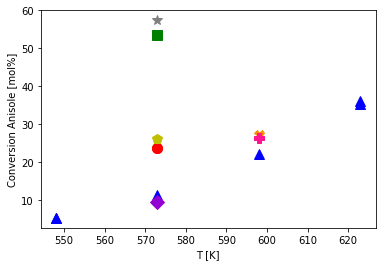

,p [MPa],Space-time [kg s mol-1],Hydrogen/Anisole ratio [-]
red circles ⬤,0.506625,386.328868,99.381656
blue triangles ▲,0.506625,193.162590,99.381656
green squares ⬛,0.506625,721.042157,358.652212
yellow pentagons ⬟,0.506625,386.328868,249.121817
purple diamonds ⯁,0.506625,96.582612,99.381656
orange crosses 🗙,0.506625,257.553632,51.101911
grey stars ★,0.506625,386.328868,358.652212
pink plus signs ✚,0.506625,128.776816,223.570861



PLOT 2:
-----------------------



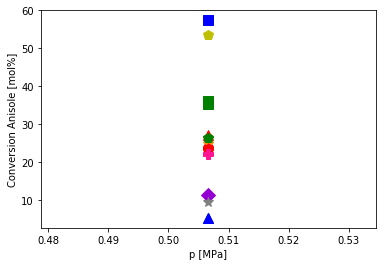

,T [K],Space-time [kg s mol-1],Hydrogen/Anisole ratio [-]
red circles ⬤,573,386.328868,99.381656
blue triangles ▲,548,193.162590,99.381656
green squares ⬛,623,193.162590,99.381656
yellow pentagons ⬟,573,721.042157,358.652212
purple diamonds ⯁,573,193.162590,99.381656
orange crosses 🗙,573,386.328868,249.121817
grey stars ★,573,96.582612,99.381656
pink plus signs ✚,598,193.162590,99.381656
red triangles ▲,598,257.553632,51.101911
blue squares ⬛,573,386.328868,358.652212



PLOT 3:
-----------------------



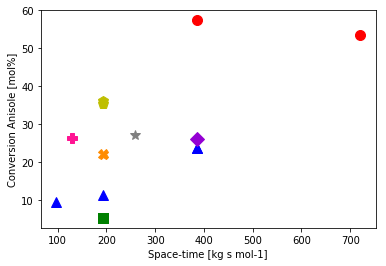

,T [K],p [MPa],Hydrogen/Anisole ratio [-]
red circles ⬤,573,0.506625,358.652212
blue triangles ▲,573,0.506625,99.381656
green squares ⬛,548,0.506625,99.381656
yellow pentagons ⬟,623,0.506625,99.381656
purple diamonds ⯁,573,0.506625,249.121817
orange crosses 🗙,598,0.506625,99.381656
grey stars ★,598,0.506625,51.101911
pink plus signs ✚,598,0.506625,223.570861



PLOT 4:
-----------------------



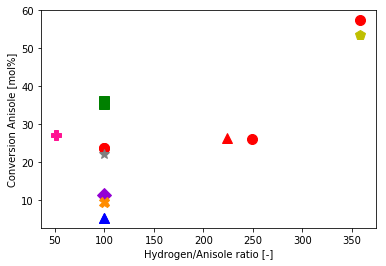

,T [K],p [MPa],Space-time [kg s mol-1]
red circles ⬤,573,0.506625,386.328868
blue triangles ▲,548,0.506625,193.162590
green squares ⬛,623,0.506625,193.162590
yellow pentagons ⬟,573,0.506625,721.042157
purple diamonds ⯁,573,0.506625,193.162590
orange crosses 🗙,573,0.506625,96.582612
grey stars ★,598,0.506625,193.162590
pink plus signs ✚,598,0.506625,257.553632
red triangles ▲,598,0.506625,128.776816



PLOT 5:
-----------------------



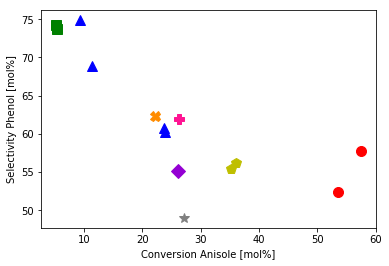

,T [K],p [MPa],Hydrogen/Anisole ratio [-]
red circles ⬤,573,0.506625,358.652212
blue triangles ▲,573,0.506625,99.381656
green squares ⬛,548,0.506625,99.381656
yellow pentagons ⬟,623,0.506625,99.381656
purple diamonds ⯁,573,0.506625,249.121817
orange crosses 🗙,598,0.506625,99.381656
grey stars ★,598,0.506625,51.101911
pink plus signs ✚,598,0.506625,223.570861



PLOT 6:
-----------------------



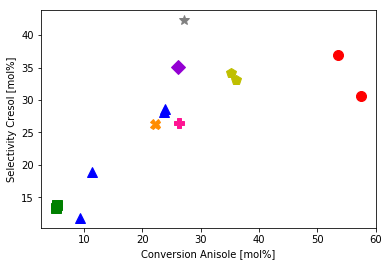

,T [K],p [MPa],Hydrogen/Anisole ratio [-]
red circles ⬤,573,0.506625,358.652212
blue triangles ▲,573,0.506625,99.381656
green squares ⬛,548,0.506625,99.381656
yellow pentagons ⬟,623,0.506625,99.381656
purple diamonds ⯁,573,0.506625,249.121817
orange crosses 🗙,598,0.506625,99.381656
grey stars ★,598,0.506625,51.101911
pink plus signs ✚,598,0.506625,223.570861



PLOT 7:
-----------------------



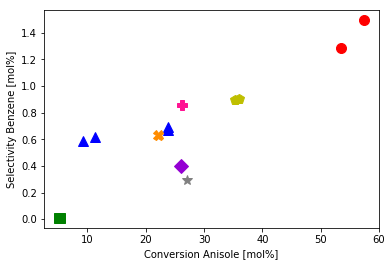

,T [K],p [MPa],Hydrogen/Anisole ratio [-]
red circles ⬤,573,0.506625,358.652212
blue triangles ▲,573,0.506625,99.381656
green squares ⬛,548,0.506625,99.381656
yellow pentagons ⬟,623,0.506625,99.381656
purple diamonds ⯁,573,0.506625,249.121817
orange crosses 🗙,598,0.506625,99.381656
grey stars ★,598,0.506625,51.101911
pink plus signs ✚,598,0.506625,223.570861



PLOT 8:
-----------------------



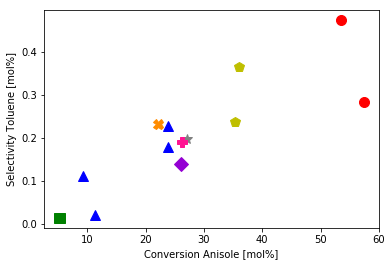

,T [K],p [MPa],Hydrogen/Anisole ratio [-]
red circles ⬤,573,0.506625,358.652212
blue triangles ▲,573,0.506625,99.381656
green squares ⬛,548,0.506625,99.381656
yellow pentagons ⬟,623,0.506625,99.381656
purple diamonds ⯁,573,0.506625,249.121817
orange crosses 🗙,598,0.506625,99.381656
grey stars ★,598,0.506625,51.101911
pink plus signs ✚,598,0.506625,223.570861



PLOT 9:
-----------------------



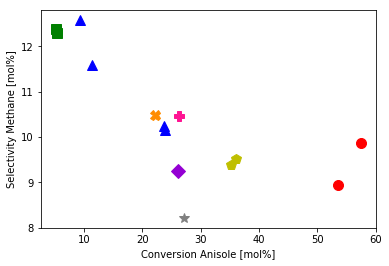

,T [K],p [MPa],Hydrogen/Anisole ratio [-]
red circles ⬤,573,0.506625,358.652212
blue triangles ▲,573,0.506625,99.381656
green squares ⬛,548,0.506625,99.381656
yellow pentagons ⬟,623,0.506625,99.381656
purple diamonds ⯁,573,0.506625,249.121817
orange crosses 🗙,598,0.506625,99.381656
grey stars ★,598,0.506625,51.101911
pink plus signs ✚,598,0.506625,223.570861



Dataframes corresponding to plots:

PLOT 1:
--------------

p [MPa]: 0.5066249999999999
Space-time [kg s mol-1]: 193.16258985631293
Hydrogen/Anisole ratio [-]: 99.38165630016528



,T [K],Conversion Anisole [mol%]
0,548,5.273463
1,548,5.204347
2,573,11.321325
3,598,22.185933
4,623,35.956045
5,623,35.252754


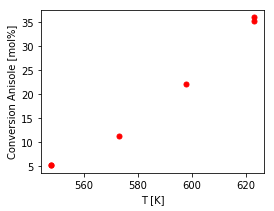


PLOT 2:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Space-time [kg s mol-1],Conversion Anisole [mol%]
0,386.328868,57.383393
1,721.042157,53.460316


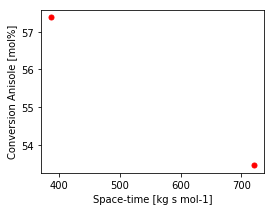


PLOT 3:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Space-time [kg s mol-1],Conversion Anisole [mol%]
0,96.582612,9.279016
1,193.162590,11.321325
2,386.328868,23.768149
3,386.328868,23.777566


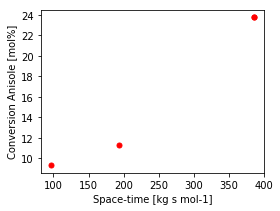


PLOT 4:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Space-time [kg s mol-1]: 386.3288679483016



,Hydrogen/Anisole ratio [-],Conversion Anisole [mol%]
0,99.381656,23.768149
1,99.381656,23.777566
2,249.121817,26.094643
3,358.652212,57.383393


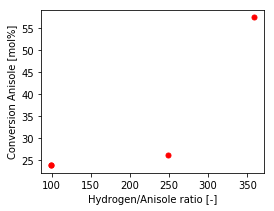


PLOT 5:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Phenol [mol%]
0,53.460316,52.341362
1,57.383393,57.774557


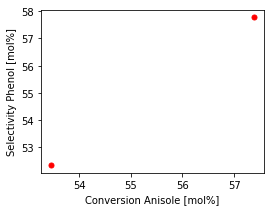


PLOT 6:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Cresol [mol%]
0,53.460316,36.954295
1,57.383393,30.565810


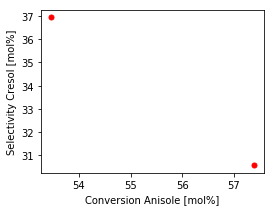


PLOT 7:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Benzene [mol%]
0,53.460316,1.287815
1,57.383393,1.494323


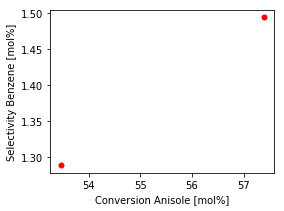


PLOT 8:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Toluene [mol%]
0,53.460316,0.473770
1,57.383393,0.284312


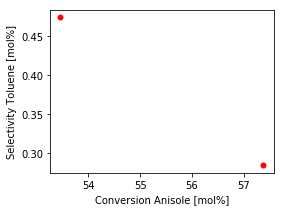


PLOT 9:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Methane [mol%]
0,53.460316,8.938196
1,57.383393,9.878147


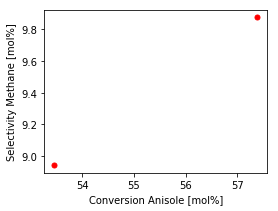


PLOT 10:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Phenol [mol%]
0,9.279016,74.871962
1,11.321325,68.890490
2,23.768149,60.746218
3,23.777566,60.312990


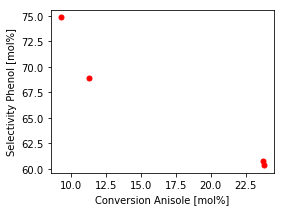


PLOT 11:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Cresol [mol%]
0,9.279016,11.849708
1,11.321325,18.886472
2,23.768149,28.143203
3,23.777566,28.577963


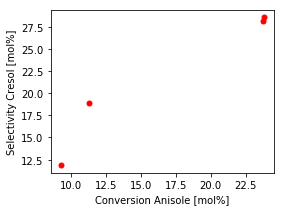


PLOT 12:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Benzene [mol%]
0,9.279016,0.590661
1,11.321325,0.617850
2,23.768149,0.691809
3,23.777566,0.666595


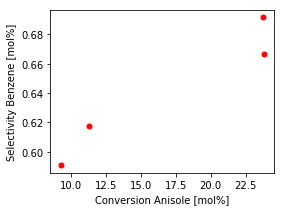


PLOT 13:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Toluene [mol%]
0,9.279016,0.110564
1,11.321325,0.020464
2,23.768149,0.179099
3,23.777566,0.227231


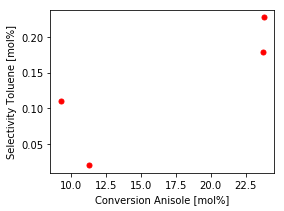


PLOT 14:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Methane [mol%]
0,9.279016,12.577104
1,11.321325,11.584723
2,23.768149,10.239671
3,23.777566,10.163264


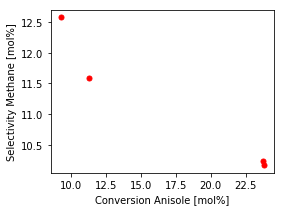


Insert indices of plots to keep, separated by spaces (insert 'all' to keep all plots): all

PLOT 1:
--------------

p [MPa]: 0.5066249999999999
Space-time [kg s mol-1]: 193.16258985631293
Hydrogen/Anisole ratio [-]: 99.38165630016528



,T [K],Conversion Anisole [mol%]
0,548,5.273463
1,548,5.204347
2,573,11.321325
3,598,22.185933
4,623,35.956045
5,623,35.252754


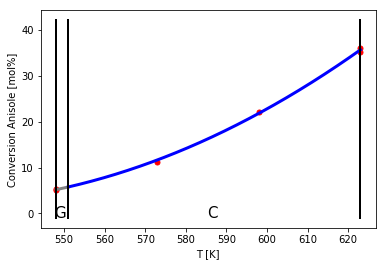

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,G,548.000000,5.180264,-
1,C,551.030303,5.771924,-
2,,623.000000,35.663040,-



PLOT 2:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Space-time [kg s mol-1],Conversion Anisole [mol%]
0,386.328868,57.383393
1,721.042157,53.460316


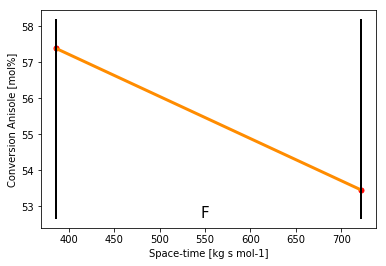

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,F,386.328868,57.383393,-
1,,721.042157,53.460316,-



PLOT 3:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Space-time [kg s mol-1],Conversion Anisole [mol%]
0,96.582612,9.279016
1,193.162590,11.321325
2,386.328868,23.768149
3,386.328868,23.777566


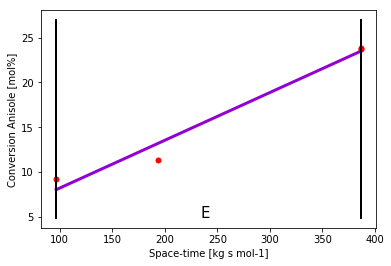

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,E,96.582612,8.039512,-
1,,386.328868,23.462992,-



PLOT 4:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Space-time [kg s mol-1]: 386.3288679483016



,Hydrogen/Anisole ratio [-],Conversion Anisole [mol%]
0,99.381656,23.768149
1,99.381656,23.777566
2,249.121817,26.094643
3,358.652212,57.383393


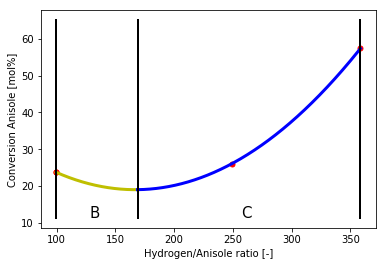

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,B,99.381656,23.772857,-
1,C,168.782361,19.039212,minimum
2,,358.652212,57.383393,-



PLOT 5:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Phenol [mol%]
0,53.460316,52.341362
1,57.383393,57.774557


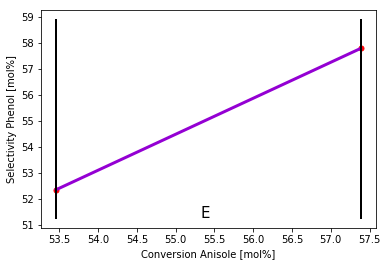

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,E,53.460316,52.341362,-
1,,57.383393,57.774557,-



PLOT 6:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Cresol [mol%]
0,53.460316,36.954295
1,57.383393,30.565810


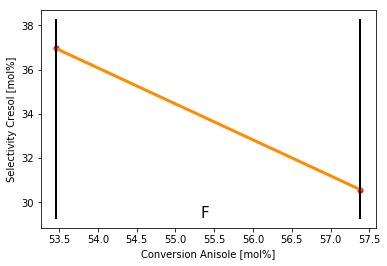

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,F,53.460316,36.954295,-
1,,57.383393,30.565810,-



PLOT 7:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Benzene [mol%]
0,53.460316,1.287815
1,57.383393,1.494323


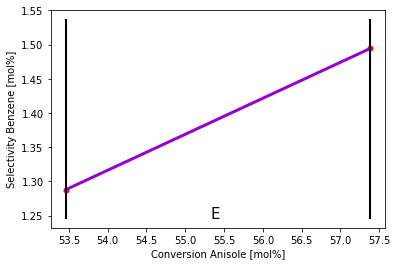

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,E,53.460316,1.287815,-
1,,57.383393,1.494323,-



PLOT 8:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Toluene [mol%]
0,53.460316,0.473770
1,57.383393,0.284312


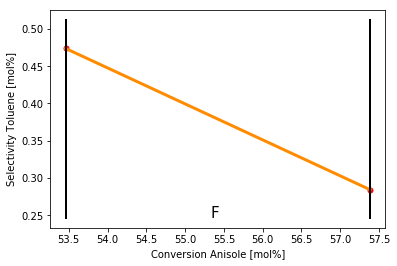

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,F,53.460316,0.473770,-
1,,57.383393,0.284312,-



PLOT 9:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 358.6522117308575



,Conversion Anisole [mol%],Selectivity Methane [mol%]
0,53.460316,8.938196
1,57.383393,9.878147


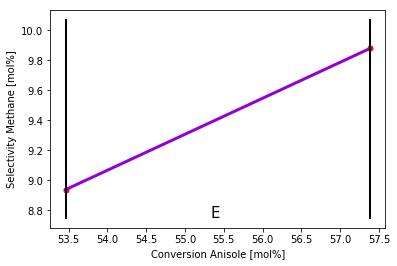

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,E,53.460316,8.938196,-
1,,57.383393,9.878147,-



PLOT 10:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Phenol [mol%]
0,9.279016,74.871962
1,11.321325,68.890490
2,23.768149,60.746218
3,23.777566,60.312990


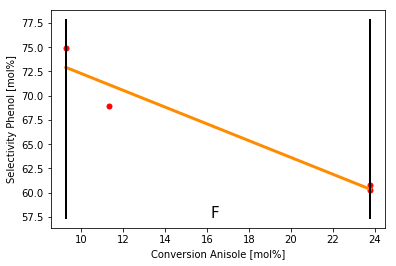

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,F,9.279016,72.925533,-
1,,23.777566,60.365818,-



PLOT 11:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Cresol [mol%]
0,9.279016,11.849708
1,11.321325,18.886472
2,23.768149,28.143203
3,23.777566,28.577963


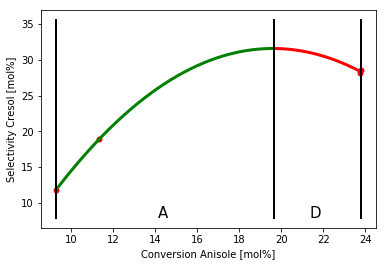

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,A,9.279016,11.850598,-
1,D,19.676966,31.580221,maximum
2,,23.777566,28.353469,-



PLOT 12:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Benzene [mol%]
0,9.279016,0.590661
1,11.321325,0.617850
2,23.768149,0.691809
3,23.777566,0.666595


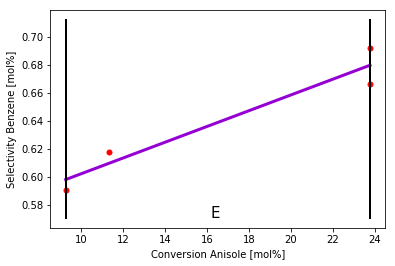

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,E,9.279016,0.597897,-
1,,23.777566,0.679817,-



PLOT 13:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Toluene [mol%]
0,9.279016,0.110564
1,11.321325,0.020464
2,23.768149,0.179099
3,23.777566,0.227231


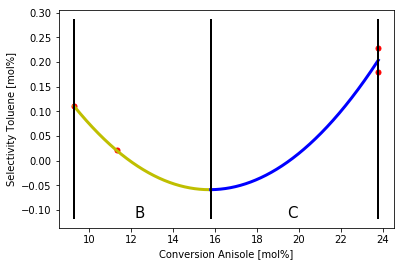

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,B,9.279016,0.110658,-
1,C,15.796041,-0.059032,minimum
2,,23.777566,0.203489,-



PLOT 14:
--------------

T [K]: 573
p [MPa]: 0.5066249999999999
Hydrogen/Anisole ratio [-]: 99.38165630016528



,Conversion Anisole [mol%],Selectivity Methane [mol%]
0,9.279016,12.577104
1,11.321325,11.584723
2,23.768149,10.239671
3,23.777566,10.163264


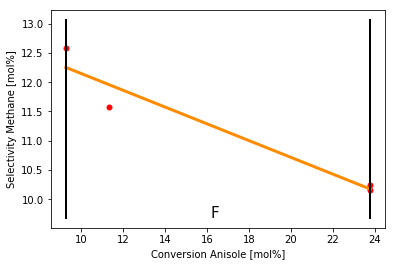

,Primitives,x-values at extremes of primitives,y-values at extremes of primitives,Extrema
0,F,9.279016,12.253905,-
1,,23.777566,10.174272,-




PARAMETRIC PLOT 1:
-----------------

T [K] : 573
p [MPa] : 0.5066249999999999


Hydrogen/Anisole ratio [-] : 358.6522117308575


,Space-time [kg s mol-1],Conversion Anisole [mol%]
0,386.328868,57.383393
1,721.042157,53.460316



Hydrogen/Anisole ratio [-] : 99.38165630016528


,Space-time [kg s mol-1],Conversion Anisole [mol%]
0,96.582612,9.279016
1,193.162590,11.321325
2,386.328868,23.768149
3,386.328868,23.777566


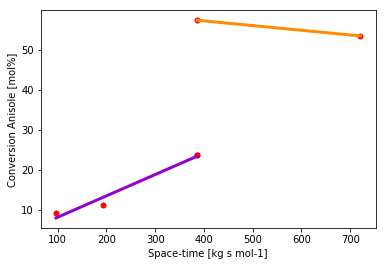

Hydrogen/Anisole ratio [-] : 358.6522117308575


,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,F,386.328868,57.383393,-
1,,721.042157,53.460316,-



Hydrogen/Anisole ratio [-] : 99.38165630016528


,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,E,96.582612,8.039512,-
1,,386.328868,23.462992,-



PARAMETRIC PLOT 2:
-----------------

T [K] : 573
p [MPa] : 0.5066249999999999


Hydrogen/Anisole ratio [-] : 358.6522117308575


,Conversion Anisole [mol%],Selectivity Phenol [mol%]
0,53.460316,52.341362
1,57.383393,57.774557


Hydrogen/Anisole ratio [-] : 99.38165630016528


,Conversion Anisole [mol%],Selectivity Phenol [mol%]
0,9.279016,74.871962
1,11.321325,68.890490
2,23.768149,60.746218
3,23.777566,60.312990


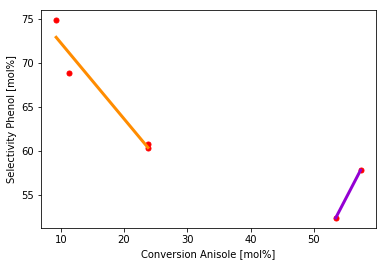

Hydrogen/Anisole ratio [-] : 358.6522117308575



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,E,53.460316,52.341362,-
1,,57.383393,57.774557,-



Hydrogen/Anisole ratio [-] : 99.38165630016528



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,F,9.279016,72.925533,-
1,,23.777566,60.365818,-




PARAMETRIC PLOT 3:
-----------------

T [K] : 573
p [MPa] : 0.5066249999999999


Hydrogen/Anisole ratio [-] : 358.6522117308575


,Conversion Anisole [mol%],Selectivity Cresol [mol%]
0,53.460316,36.954295
1,57.383393,30.565810


Hydrogen/Anisole ratio [-] : 99.38165630016528


,Conversion Anisole [mol%],Selectivity Cresol [mol%]
0,9.279016,11.849708
1,11.321325,18.886472
2,23.768149,28.143203
3,23.777566,28.577963


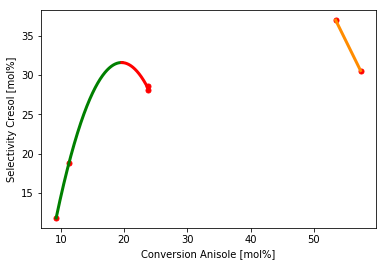

Hydrogen/Anisole ratio [-] : 358.6522117308575



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,F,53.460316,36.954295,-
1,,57.383393,30.565810,-



Hydrogen/Anisole ratio [-] : 99.38165630016528



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,A,9.279016,11.850598,-
1,D,19.676966,31.580221,maximum
2,,23.777566,28.353469,-




PARAMETRIC PLOT 4:
-----------------

T [K] : 573
p [MPa] : 0.5066249999999999


Hydrogen/Anisole ratio [-] : 358.6522117308575


,Conversion Anisole [mol%],Selectivity Benzene [mol%]
0,53.460316,1.287815
1,57.383393,1.494323


Hydrogen/Anisole ratio [-] : 99.38165630016528


,Conversion Anisole [mol%],Selectivity Benzene [mol%]
0,9.279016,0.590661
1,11.321325,0.617850
2,23.768149,0.691809
3,23.777566,0.666595


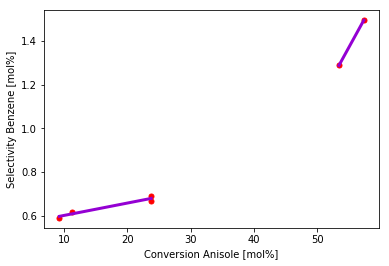

Hydrogen/Anisole ratio [-] : 358.6522117308575



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,E,53.460316,1.287815,-
1,,57.383393,1.494323,-



Hydrogen/Anisole ratio [-] : 99.38165630016528



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,E,9.279016,0.597897,-
1,,23.777566,0.679817,-




PARAMETRIC PLOT 5:
-----------------

T [K] : 573
p [MPa] : 0.5066249999999999


Hydrogen/Anisole ratio [-] : 358.6522117308575


,Conversion Anisole [mol%],Selectivity Toluene [mol%]
0,53.460316,0.473770
1,57.383393,0.284312


Hydrogen/Anisole ratio [-] : 99.38165630016528


,Conversion Anisole [mol%],Selectivity Toluene [mol%]
0,9.279016,0.110564
1,11.321325,0.020464
2,23.768149,0.179099
3,23.777566,0.227231


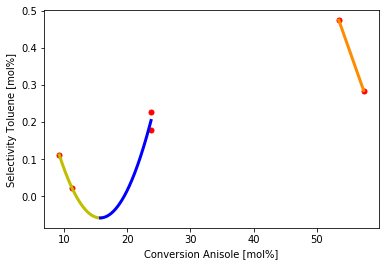

Hydrogen/Anisole ratio [-] : 358.6522117308575



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,F,53.460316,0.473770,-
1,,57.383393,0.284312,-



Hydrogen/Anisole ratio [-] : 99.38165630016528



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,B,9.279016,0.110658,-
1,C,15.796041,-0.059032,minimum
2,,23.777566,0.203489,-




PARAMETRIC PLOT 6:
-----------------

T [K] : 573
p [MPa] : 0.5066249999999999


Hydrogen/Anisole ratio [-] : 358.6522117308575


,Conversion Anisole [mol%],Selectivity Methane [mol%]
0,53.460316,8.938196
1,57.383393,9.878147


Hydrogen/Anisole ratio [-] : 99.38165630016528


,Conversion Anisole [mol%],Selectivity Methane [mol%]
0,9.279016,12.577104
1,11.321325,11.584723
2,23.768149,10.239671
3,23.777566,10.163264


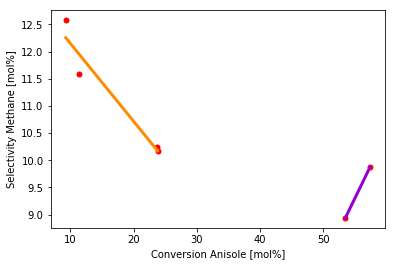

Hydrogen/Anisole ratio [-] : 358.6522117308575



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,E,53.460316,8.938196,-
1,,57.383393,9.878147,-



Hydrogen/Anisole ratio [-] : 99.38165630016528



,Primitives,x-values at limits of primitives,y-values at limits of primitives,Extrema
0,F,9.279016,12.253905,-
1,,23.777566,10.174272,-


In [40]:
df = pd.read_excel(r'HDO Standardised.xlsx')
dataframes = importdata(df)